In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import read_pgm, read_eye_annotations
from pathlib import Path


# path to patches
path_to_positive_patches = '../patches/positive/'
path_to_negative_patches = '../patches/negative/'

## Create positive patches for each eye and store them 

## Create random negative patches

In [2]:
def pos_patch(image_no, patch_size):

    # get image
    image = plt.imread('../images/BioID_{0:04}.pgm'.format(image_no))

    # Get eyes location
    left_eye, right_eye = read_eye_annotations(img_no=image_no)

    # Define offset 
    Nx, Ny = int((patch_size[0] - 1) / 2), int((patch_size[1] - 1) / 2)

    # Define mask
    mask = np.ones(image.shape)


    # Perform padding
    pad_1, pad_2 = - min(left_eye[1] - Ny, 0), - image.shape[0] + max(left_eye[1] + Ny + 1, image.shape[0])
    pad_3, pad_4 = - min(left_eye[0] - Nx, 0), - image.shape[1] + max(left_eye[0] + Ny + 1, image.shape[1])

    # Create left patch
    patch_left =  image[max(left_eye[1] - Ny, 0):min(left_eye[1] + Ny + 1, image.shape[0]), max(left_eye[0] - Nx, 0): min(left_eye[0] + Nx + 1, image.shape[1])]
    
    # Remove location of left patch
    mask[max(left_eye[1] - Ny, 0):min(left_eye[1] + Ny + 1, image.shape[0]), max(left_eye[0] - Nx, 0): min(left_eye[0] + Nx + 1, image.shape[1])] = 0

    # Pad the patch
    patch_left = np.pad(patch_left, ((pad_1, pad_2), (pad_3, pad_4)))

    assert(patch_left.shape == patch_size)    


    # Perform padding
    pad_1, pad_2 = - min(right_eye[1] - Ny, 0), - image.shape[0] + max(right_eye[1] + Ny + 1, image.shape[0])
    pad_3, pad_4 = - min(right_eye[0] - Nx, 0), - image.shape[1] + max(right_eye[0] + Ny + 1, image.shape[1])


    # Create right patch
    patch_right =  image[max(right_eye[1] - Ny, 0):min(right_eye[1] + Ny + 1, image.shape[0]), max(right_eye[0] - Nx, 0): min(right_eye[0] + Nx + 1, image.shape[1])]

    # Remove location of right patch
    mask[max(right_eye[1] - Ny, 0):min(right_eye[1] + Ny + 1, image.shape[0]), max(right_eye[0] - Nx, 0): min(right_eye[0] + Nx + 1, image.shape[1])] = 0


    # Pad the patch
    patch_right = np.pad(patch_right, ((pad_1, pad_2), (pad_3, pad_4)))

    assert(patch_right.shape == patch_size)

    return patch_left, patch_right, mask


def neg_patch(image_no, mask, patch_size, rs):

    # get image
    image = plt.imread('../images/BioID_{0:04}.pgm'.format(image_no))

    assert(mask.shape == image.shape)

    Nx, Ny = int((patch_size[0] - 1) / 2), int((patch_size[1] - 1) / 2)

    v = np.argwhere(mask==1)

    center_id = rs.randint(0, len(v))

    center = v[center_id]

    # Perform padding
    pad_1, pad_2 = - min(center[0] - Ny, 0), - image.shape[0] + max(center[0] + Ny + 1, image.shape[0])
    pad_3, pad_4 = - min(center[1] - Nx, 0), - image.shape[1] + max(center[1] + Ny + 1, image.shape[1])

    patch =  image[max(center[0] - Ny, 0):min(center[0] + Ny + 1, image.shape[0]), max(center[1] - Nx, 0): min(center[1] + Nx + 1, image.shape[1])]
    

    # Pad the patch
    patch = np.pad(patch, ((pad_1, pad_2), (pad_3, pad_4)))

    assert(patch.shape == patch_size)

    return patch


In [21]:
num_images = 1 #1251

patch_size = (251, 251)

rs = np.random.RandomState(seed=1)

# Extract positive patches
for i in range(num_images):


    left, right, mask = pos_patch(i, patch_size)
    
    print(left.shape)

    n_patch = neg_patch(i, mask, patch_size, rs)

    # Store left patch 
    plt.imsave(path_to_positive_patches + 'left/left_patch_{0:04}.jpg'.format(i), left, cmap='gray')

    # Store right patch
    plt.imsave(path_to_positive_patches + 'right/right_patch_{0:04}.jpg'.format(i), right, cmap='gray')

    # Store negative patch
    plt.imsave(path_to_negative_patches + 'neg_patch_{0:04}.jpg'.format(i), n_patch, cmap='gray')

(251, 251)


## Negative patch sample

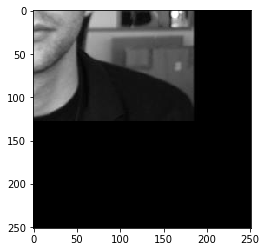

In [22]:
im = plt.imread('../patches/negative/neg_patch_0000.jpg')
plt.imshow(im)

## Positive patches samples

Text(0.5, 1.0, 'Right eye')

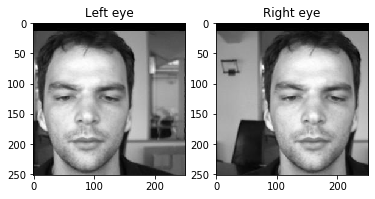

In [30]:

fig, ax = plt.subplots(1, 2)
left = plt.imread('../patches/positive/left/left_patch_0000.jpg')
ax[0].imshow(left)
ax[0].set_title('Left eye')

right = plt.imread('../patches/positive/right/right_patch_0000.jpg')
ax[1].imshow(right)
ax[1].set_title('Right eye')